In [1]:
from gp import *

In [2]:
a = Tensor.rand(2, 2)
b = Tensor.rand(2, 2)
c = Tensor.rand(2, 2)

In [3]:
Tensor.mean(Tensor.stack([a, b, c], dim=0), axis=0).numpy()

array([[0.2924595 , 0.39614248],
       [0.43152946, 0.4248658 ]], dtype=float32)

In [4]:
tree = Tree()

In [5]:
len(Tensor([0.3, 0.5, 0.2]).unsqueeze(0).shape)

2

In [6]:
Node1 = ValueNode(None, [], tree, a)
Node2 = ValueNode(None, [], tree, b)
Node3 = ValueNode(None, [], tree, c)

mean_node = WeightedMeanNode(Node1, [Node2, Node3], tree, weights = Tensor([0.3, 0.5, 0.2]).unsqueeze(0))

Node1.parent = None
Node1.children = [mean_node]
Node2.parent = mean_node
Node2.children = []
Node3.parent = mean_node
Node3.children = []

In [7]:
Node1.calculate().numpy()

TypeError: super(type, obj): obj must be an instance or subtype of type

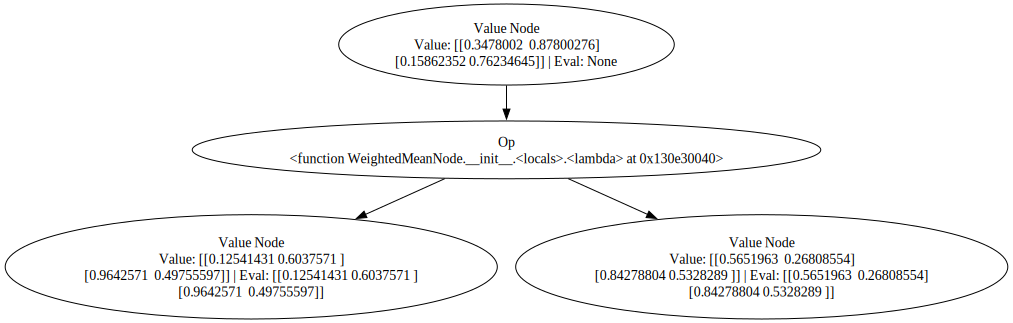

In [ ]:
draw_tree(Node1)

In [ ]:
import numpy as np
from enum import Enum
from functools import reduce
from operator import add, sub, mul, truediv

In [ ]:
from tinygrad.tensor import Tensor

ModuleNotFoundError: No module named 'tinygrad'

In [ ]:
class Node:
    def __init__(self):
        self.children = []  # child nodes
        self.parent = None

    def add_child(self, child_node):
        self.children.append(child_node)


class OperatorNode(Node):
    def __init__(self, parent, children):
        super().__init__()
        self.parent = parent
        self.children = children

    def calculate(self):
        pass

    def __str__(self):
        return f'OperatorNode: {None}'


class BinaryOperatorNode(OperatorNode):
    def __init__(self, parent, children):
        super().__init__(parent, children)
        self.operator = lambda x: None

    def calculate(self):
        return reduce(lambda x, y: self.operator(x, y), [self.parent.evaluation if self.parent.evaluation is not None else self.parent.value] + [child.calculate() for child in self.children])

    def __str__(self):
        return f'BinaryOperatorNode: {self.operator}'
    
class AddNode(BinaryOperatorNode):
    def __init__(self, parent, children):
        super().__init__(parent, children)
        self.operator = add

class SubNode(BinaryOperatorNode):
    def __init__(self, parent, children):
        super().__init__(parent, children)
        self.operator = sub

class MulNode(BinaryOperatorNode):
    def __init__(self, parent, children):
        super().__init__(parent, children)
        self.operator = mul

class DivNode(BinaryOperatorNode):
    def __init__(self, parent, children):
        super().__init__(parent, children)
        self.operator = truediv



class ValueNode(Node):
    def __init__(self, parent, children, value):
        super().__init__()
        self.value = value
        self.parent = parent
        self.children = children
        self.evaluation = None

    def calculate(self):
        if self.children:
            self.evaluation = self.children[0].calculate()
        else:
            self.evaluation = self.value
        return self.evaluation

    def __str__(self):
        return f'ValueNode: {self.value}'
    
    def add_child(self, child_node):
        super().add_child(child_node)
        self.evaluation = None

In [ ]:
## Example tree calculating
## out = 6 + 3 + 2 + 4 + 5

"""

           6
           |     
           +
        |     |
        3     2
              |
              +
            |   |
            4   5

"""

root = ValueNode(None, [], 6)

three = ValueNode(root, [], 3)
two = ValueNode(root, [], 2)
four = ValueNode(root, [], 4)
five = ValueNode(root, [], 5)

add1 = AddNode(root, [three, two])
add2 = AddNode(two, [four, five])

root.add_child(add1)
two.add_child(add2)



In [ ]:
import random

class Tree:
    def __init__(self):
        self.root = ValueNode(None, [], np.random.randint(1,10))
        self.nodes = [self.root]
    
    def grow_tree(self, node, depth=0, max_depth=3):
        if depth >= max_depth:
            return
        
        # Add operator
        op_node = random.choice([AddNode, SubNode, MulNode, DivNode])(node, [])
        node.add_child(op_node)
        
        # Determine the number of children for the operator (either 1 or 2)
        num_children = 2 if random.random() < 0.2 or depth <= 1 else 1  # 20% chance for 2 children
        
        for i in range(num_children):
            # Add model with a unique ID (for illustration)
            val = np.random.randint(1, 10)
            model_node = ValueNode(op_node, [], val)
            op_node.add_child(model_node)
            
            # Recursively grow the tree
            self.grow_tree(model_node, depth + 1, max_depth)


In [ ]:
from graphviz import Digraph

def draw_tree(node, dot=None):
    if dot is None:
        dot = Digraph(comment='Tree')
        
    if isinstance(node, ValueNode):
        dot.node(f'{id(node)}', f'Value Node\nValue: {node.value} | Eval: {node.evaluation}')
    else:
        dot.node(f'{id(node)}', f'Op\n{node.operator}')
    
    for child in node.children:
        draw_tree(child, dot)
        dot.edge(f'{id(node)}', f'{id(child)}')
        
    return dot


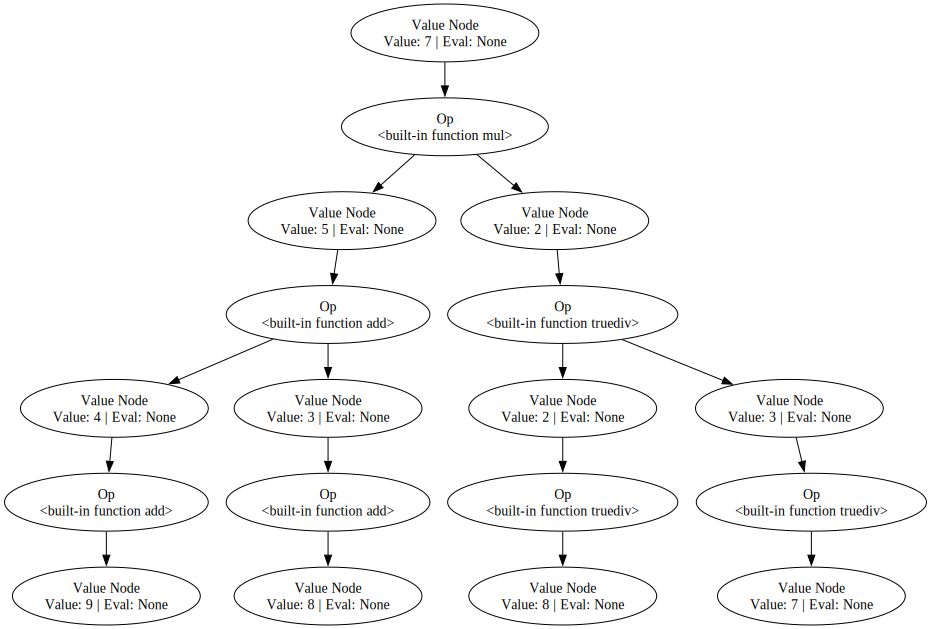

In [ ]:
# Create a tree and grow it
tree = Tree()
tree.grow_tree(tree.root, max_depth=3)

# Draw the tree using Graphviz
dot = draw_tree(tree.root)

dot


In [ ]:
tree.root.calculate()

3789.3333333333335

In [ ]:
dot = draw_tree(tree.root)


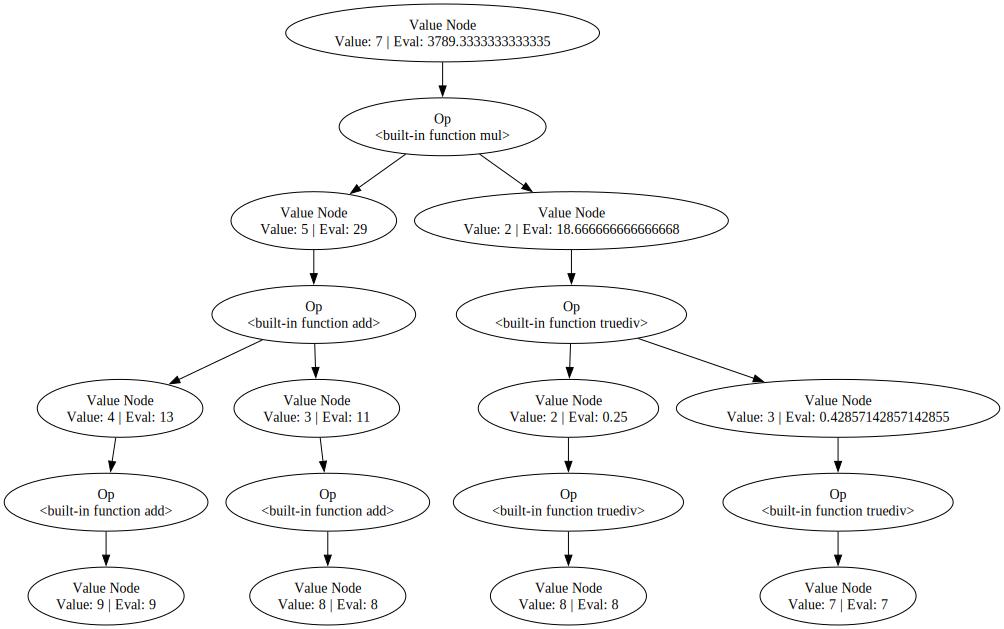

In [ ]:
dot